# ⚙️ Implementasi Aplikasi Pelacak Pengeluaran GUI dengan Tkinter dan Penyimpanan File CSV di Python

Berikut adalah skrip Python yang membangun aplikasi pelacak pengeluaran menggunakan library Tkinter dan file CSV untuk penyimpanan data:

* **Mengimpor Modul:** Mengimpor `tkinter`, `messagebox`, `ttk` (untuk combobox), `csv`, dan `os`.
* **Konstanta `EXPENSE_FILE`:** Mendefinisikan nama file CSV untuk menyimpan data pengeluaran.
* **List `expenses`:** Menyimpan data pengeluaran dalam format list.
* **Fungsi `load_expenses()`:** Memuat data pengeluaran dari file CSV saat aplikasi dimulai.
* **Fungsi `save_expenses()`:** Menyimpan data pengeluaran saat ini ke file CSV.
* **Fungsi `add_expense()`:** Mengambil detail pengeluaran dari input, memvalidasi input, menambahkannya ke list `expenses` dan listbox, menghitung total, membersihkan input, dan menyimpan data.
* **Fungsi `delete_expense()`:** Menghapus pengeluaran yang dipilih dari listbox dan list `expenses`, menghitung total, dan menyimpan data.
* **Fungsi `clear_inputs()`:** Membersihkan semua input fields.
* **Fungsi `calculate_total()`:** Menghitung total pengeluaran dari list `expenses` dan memperbarui label total.
* **Fungsi `clear_all()`:** Menghapus semua pengeluaran setelah konfirmasi pengguna.
* **Layout GUI:** Membuat label, entry fields, dropdown (combobox), listbox dengan scrollbar, dan tombol-tombol untuk interaksi.
* **Memuat Data Awal dan Menghitung Total:** Memanggil fungsi `load_expenses()` dan `calculate_total()` saat aplikasi dimulai.
* **Tombol Keluar:** Menutup aplikasi.
* **Menjalankan Aplikasi (`root.mainloop()`):** Memulai loop utama Tkinter untuk menampilkan dan mengelola jendela aplikasi serta interaksi pengguna.

Jalankan sel kode di bawah untuk mulai mencatat dan mengelola pengeluaranmu!

In [ ]:
# Objective: Build a GUI-based Expense Tracker App that allows users to:

#Add new expenses with category, amount, and description.
#Display expense history in a Listbox.
#Delete expenses from the list.
#Save and load expenses from a file.
#Calculate and display total expenses.

#Core Features:
#User-friendly GUI with Tkinter widgets.
#Validation for numerical inputs.
#Persistent data storage using a CSV file.
#Total expense calculation.
#Ability to delete specific expenses.

# Key GUI Components:
# Entry Widgets: For entering expense details.
# Dropdown (OptionMenu): For selecting expense categories.
# Listbox: For displaying added expenses.
# Labels: To display dynamic updates (e.g., Total Expenses).
# Buttons: For adding, deleting, clearing, and exporting data.

import tkinter as tk
from tkinter import messagebox, ttk
import csv
import os

# Expense Tracker App

# File for storing expenses
EXPENSE_FILE = "expenses.csv"

# Create Main Application Window
root = tk.Tk()
root.title("Expense Tracker App")
root.geometry("600x600")
root.configure(bg="#f0f4c3")

# Expense Data List
expenses = []

# Load Existing Expenses from CSV
def load_expenses():
    if os.path.exists(EXPENSE_FILE):
        with open(EXPENSE_FILE, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                expenses.append(row)
                expense_listbox.insert(tk.END, f"{row[0]} | ${row[1]} | {row[2]}")

# Save Expenses to CSV
def save_expenses():
    with open(EXPENSE_FILE, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        for expense in expenses:
            writer.writerow(expense)

# Add Expense
def add_expense():
    category = category_var.get()
    amount = amount_entry.get()
    description = description_entry.get()
    
    if not amount.isdigit() or not category or not description:
        messagebox.showerror("Invalid Input", "Please enter valid expense details.")
        return
    
    expenses.append([category, amount, description])
    expense_listbox.insert(tk.END, f"{category} | ${amount} | {description}")
    calculate_total()
    clear_inputs()
    save_expenses()

# Delete Selected Expense
def delete_expense():
    selected = expense_listbox.curselection()
    if not selected:
        messagebox.showerror("Error", "Please select an expense to delete.")
        return
    
    index = selected[0]
    del expenses[index]
    expense_listbox.delete(index)
    calculate_total()
    save_expenses()

# Clear All Inputs
def clear_inputs():
    category_var.set("Select Category")
    amount_entry.delete(0, tk.END)
    description_entry.delete(0, tk.END)

# Calculate Total Expenses
def calculate_total():
    total = sum(float(expense[1]) for expense in expenses)
    total_label.config(text=f"Total Expenses: ${total:.2f}")

# Clear All Expenses
def clear_all():
    if messagebox.askyesno("Confirm", "Are you sure you want to clear all expenses?"):
        expenses.clear()
        expense_listbox.delete(0, tk.END)
        calculate_total()
        save_expenses()

# --- GUI Layout ---

# Title
title_label = tk.Label(root, text="Expense Tracker", font=("Arial", 24), bg="#f0f4c3")
title_label.pack(pady=10)

# Input Frame
input_frame = tk.Frame(root, bg="#f0f4c3")
input_frame.pack(pady=10)

# Category
category_label = tk.Label(input_frame, text="Category:", font=("Arial", 12), bg="#f0f4c3")
category_label.grid(row=0, column=0, padx=5, pady=5)
category_var = tk.StringVar(value="Select Category")
category_dropdown = ttk.Combobox(input_frame, textvariable=category_var, values=["Food", "Transport", "Rent", "Utilities", "Other"])
category_dropdown.grid(row=0, column=1, padx=5, pady=5)

# Amount
amount_label = tk.Label(input_frame, text="Amount ($):", font=("Arial", 12), bg="#f0f4c3")
amount_label.grid(row=1, column=0, padx=5, pady=5)
amount_entry = tk.Entry(input_frame, font=("Arial", 12))
amount_entry.grid(row=1, column=1, padx=5, pady=5)

# Description
description_label = tk.Label(input_frame, text="Description:", font=("Arial", 12), bg="#f0f4c3")
description_label.grid(row=2, column=0, padx=5, pady=5)
description_entry = tk.Entry(input_frame, font=("Arial", 12))
description_entry.grid(row=2, column=1, padx=5, pady=5)

# Buttons
btn_frame = tk.Frame(root, bg="#f0f4c3")
btn_frame.pack(pady=10)

add_button = tk.Button(btn_frame, text="Add Expense", command=add_expense, bg="#4caf50", fg="black")
add_button.grid(row=0, column=0, padx=5)

delete_button = tk.Button(btn_frame, text="Delete Expense", command=delete_expense, bg="#f44336", fg="black")
delete_button.grid(row=0, column=1, padx=5)

clear_button = tk.Button(btn_frame, text="Clear All", command=clear_all, bg="#607d8b", fg="black")
clear_button.grid(row=0, column=2, padx=5)

# Expense Listbox with Scrollbar
frame = tk.Frame(root)
frame.pack(pady=10)

scrollbar = tk.Scrollbar(frame)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

expense_listbox = tk.Listbox(frame, width=50, height=15, yscrollcommand=scrollbar.set, font=("Arial", 12))
expense_listbox.pack()

scrollbar.config(command=expense_listbox.yview)

# Total Label
total_label = tk.Label(root, text="Total Expenses: $0.00", font=("Arial", 14), bg="#f0f4c3")
total_label.pack(pady=10)

# Load Previous Data
load_expenses()
calculate_total()

# Exit Button
exit_button = tk.Button(root, text="Exit", command=root.destroy, bg="#d32f2f", fg="black")
exit_button.pack(pady=10)

# Run Application
root.mainloop()

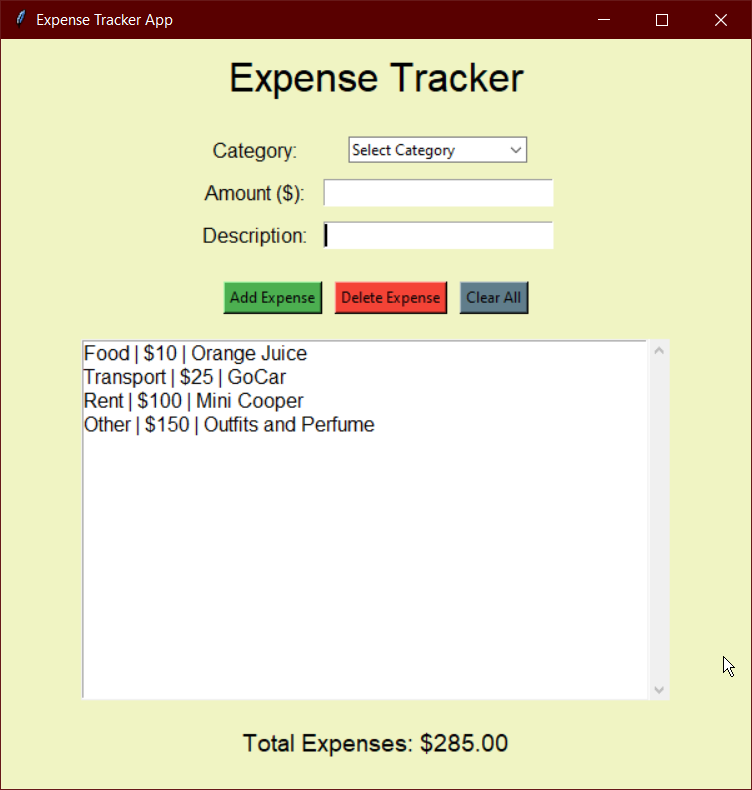